In [117]:

# import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler
get_ipython().run_line_magic('matplotlib', 'inline')


In [118]:
# Reading Train data
df_train=pd.read_csv('C:/Users/sudhakaran.srinivasa/Desktop/Personal/house-prices-advanced-regression-techniques/train.csv')

In [119]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [120]:
df_train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

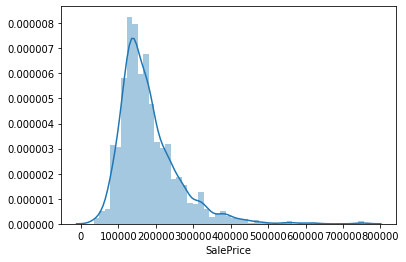

In [121]:
sns.distplot(df_train['SalePrice'])

In [122]:
# Reading Train data
df_train_withoutlier=pd.read_csv('C:/Users/sudhakaran.srinivasa/Desktop/Personal/house-prices-advanced-regression-techniques/train_with_outlier.csv')

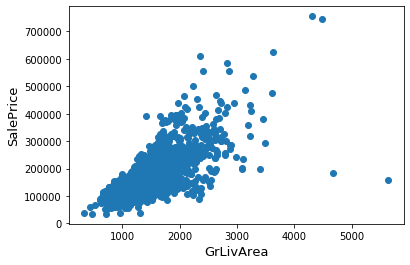

In [123]:
fig, ax = plt.subplots()
ax.scatter(x = df_train_withoutlier['GrLivArea'], y = df_train_withoutlier['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

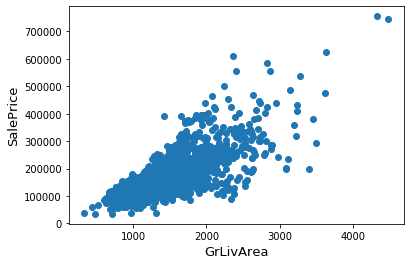

In [124]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

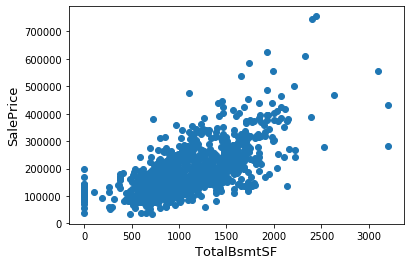

In [125]:

fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

In [126]:
df_train['SalePrice']=np.log1p(df_train['SalePrice'])

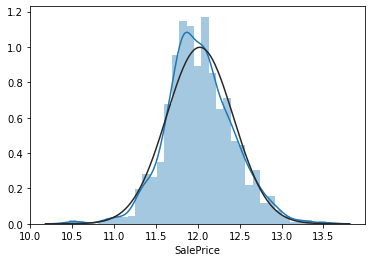

In [127]:

sns.distplot(df_train['SalePrice'], fit=norm)

In [128]:
ntrain = df_train.shape[0]

In [129]:
ntrain

1458

In [130]:
df_test=pd.read_csv('C:/Users/sudhakaran.srinivasa/Desktop/Personal/house-prices-advanced-regression-techniques/test.csv')

In [131]:
ntest=df_test.shape[0]
ntest

1459

In [132]:
train_ID = df_train['Id']
test_ID = df_test['Id']

In [133]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

In [134]:
y_train = df_train.SalePrice.values

In [135]:
# combining test and train data

final_data = pd.concat((df_train, df_test)).reset_index(drop=True)
final_data.drop(['SalePrice'], axis=1, inplace=True)

In [136]:

final_data.shape

(2917, 80)

In [137]:
# % missing value

ss=final_data.isnull().sum()


In [138]:
ss
percent=(ss/2907)*100
percent
percent_final=percent.sort_values(ascending=False)
percent_final
percent_final.head(10)

PoolQC          100.034400
MiscFeature      96.732026
Alley            93.532852
Fence            80.701754
FireplaceQu      48.847609
LotFrontage      16.718266
GarageQual        5.469556
GarageFinish      5.469556
GarageYrBlt       5.469556
GarageCond        5.469556
dtype: float64

In [139]:
final_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2913,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2914,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
2915,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [140]:

# missing value treatment
# filling NA into None

for col in ("PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond",
           "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
            "BsmtFinType2", "MSSubClass", "MasVnrType"):
    final_data[col] = final_data[col].fillna("None")

# The area of the lot out front is likely to be similar to the houses in the local neighbourhood
#use the median value of the houses in the neighbourhood to fill
final_data["LotFrontage"] = final_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


#missing values with 0 
for col in ("GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", 
           "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea",
           "BsmtFullBath", "BsmtHalfBath"):
    final_data[col] = final_data[col].fillna(0)



#Mode
final_data['MSZoning'] = final_data['MSZoning'].fillna(final_data['MSZoning'].mode()[0])
final_data['Electrical'] = final_data['Electrical'].fillna(final_data['Electrical'].mode()[0])
final_data['KitchenQual'] = final_data['KitchenQual'].fillna(final_data['KitchenQual'].mode()[0])
final_data['Exterior1st'] = final_data['Exterior1st'].fillna(final_data['Exterior1st'].mode()[0])
final_data['Exterior2nd'] = final_data['Exterior2nd'].fillna(final_data['Exterior2nd'].mode()[0])
final_data['SaleType'] = final_data['SaleType'].fillna(final_data['SaleType'].mode()[0])
final_data["Functional"] = final_data["Functional"].fillna(final_data['Functional'].mode()[0])

In [141]:

# Feature Engineeering 

# Age of building
final_data['AgeWhenSold']  = final_data['YrSold'] - final_data['YearBuilt']
final_data['YearsSinceRemod']  = final_data['YrSold'] - final_data['YearRemodAdd']


In [142]:
# drop columns 

final_data = final_data.drop(["YearBuilt"],axis=1)
final_data = final_data.drop(["YearRemodAdd"],axis=1)
final_data = final_data.drop(["YrSold"],axis=1)
final_data = final_data.drop(["GarageYrBlt"],axis=1)
# dropping utilities
final_data = final_data.drop(['Utilities'], axis=1)


In [143]:

final_data['MSSubClass'] = final_data['MSSubClass'].apply(str)

# Overall condition
final_data['OverallCond'] = final_data['OverallCond'].astype(str)
final_data['MoSold'] = final_data['MoSold'].astype(str)


In [144]:
# label encoder 


from sklearn.preprocessing import LabelEncoder
columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in columns:
    lbl = LabelEncoder() 
    lbl.fit(list(final_data[c].values)) 
    final_data[c] = lbl.transform(list(final_data[c].values))
        
print('Shape final_data: ', final_data.shape)


Shape final_data:  (2917, 77)


In [145]:

# Feature Engineering

# Overall quality of the house
final_data["OverallGrade"] = final_data["OverallQual"] * final_data["OverallCond"]
# Overall quality of the exterior
final_data["ExterGrade"] = final_data["ExterQual"] * final_data["ExterCond"]
# Overall kitchen score
final_data["KitchenScore"] = final_data["KitchenAbvGr"] * final_data["KitchenQual"]
# Overall fireplace score
final_data["FireplaceScore"] = final_data["Fireplaces"] * final_data["FireplaceQu"]


# Total number of bathrooms
final_data["TotalBath"] = final_data["BsmtFullBath"] + (0.5 * final_data["BsmtHalfBath"]) + final_data["FullBath"] + (0.5 * final_data["HalfBath"])
# Total SF for house
final_data["TotalSF"] = final_data["GrLivArea"] + final_data["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
final_data["FloorsSF"] = final_data["1stFlrSF"] + final_data["2ndFlrSF"]
# Total SF for porch
final_data["PorchSF"] = final_data["OpenPorchSF"] + final_data["EnclosedPorch"] + final_data["3SsnPorch"] + final_data["ScreenPorch"]
# Has masonry veneer or not
final_data["HasMasVnr"] = final_data.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})
# House completed before sale or not
final_data["CompletedBFSale"] = final_data.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})


In [146]:
# Month Sold


final_data['mnth_sin'] = np.sin((final_data.MoSold-1)*(2.*np.pi/12))
final_data['mnth_cos'] = np.cos((final_data.MoSold-1)*(2.*np.pi/12))
final_data["TotalBuiltSF"] = final_data["GrLivArea"] + final_data["GarageArea"]+ final_data["OpenPorchSF"]+ final_data["PoolArea"]
final_data["BuiltInRatio"] = final_data["TotalBuiltSF"] /final_data["LotArea"]
final_data["GarageGrade"] = final_data["GarageQual"] * final_data["GarageCond"]


In [147]:

final_data = final_data.drop(["Exterior2nd"   ],axis=1)
final_data = final_data.drop(["Fence"   ],axis=1)
final_data = final_data.drop(["Functional"       ],axis=1)
final_data = final_data.drop(["GarageCond"       ],axis=1)
final_data = final_data.drop(["GarageFinish"      ],axis=1)
final_data = final_data.drop(["GarageQual"    ],axis=1)
final_data = final_data.drop(["KitchenAbvGr"       ],axis=1)
final_data = final_data.drop(["KitchenQual"       ],axis=1)
final_data = final_data.drop(["MiscFeature"       ],axis=1)

final_data = final_data.drop(["MiscVal"       ],axis=1)
final_data = final_data.drop(["OverallCond"       ],axis=1)
final_data = final_data.drop(["OverallQual"       ],axis=1)
final_data = final_data.drop(["Foundation"   ],axis=1)


In [148]:


final_data = final_data.drop(["BsmtFullBath"   ],axis=1)
final_data = final_data.drop(["BsmtHalfBath"   ],axis=1)
final_data = final_data.drop(["FullBath"       ],axis=1)
final_data = final_data.drop(["HalfBath"       ],axis=1)
final_data = final_data.drop(["GrLivArea"      ],axis=1)
final_data = final_data.drop(["TotalBsmtSF"    ],axis=1)
final_data = final_data.drop(["1stFlrSF"       ],axis=1)
final_data = final_data.drop(["2ndFlrSF"       ],axis=1)
final_data = final_data.drop(["TotalSF"       ],axis=1)
final_data = final_data.drop(["FloorsSF"       ],axis=1)

final_data = final_data.drop(["OpenPorchSF"       ],axis=1)
final_data = final_data.drop(["EnclosedPorch"       ],axis=1)
final_data = final_data.drop(["3SsnPorch"       ],axis=1)
final_data = final_data.drop(["ScreenPorch"       ],axis=1)
final_data = final_data.drop(["PorchSF"       ],axis=1)


In [149]:

final_data = final_data.drop(["GarageCars"   ],axis=1)
final_data = final_data.drop(["TotalBath"   ],axis=1)
final_data = final_data.drop(["Alley"       ],axis=1)
final_data = final_data.drop(["BsmtFinSF1"       ],axis=1)
final_data = final_data.drop(["BsmtFinSF2"      ],axis=1)
final_data = final_data.drop(["BsmtUnfSF"    ],axis=1)
final_data = final_data.drop(["GarageArea"       ],axis=1)
final_data = final_data.drop(["LowQualFinSF"       ],axis=1)
final_data = final_data.drop(["MoSold"       ],axis=1)
final_data = final_data.drop(["PoolArea"       ],axis=1)

final_data = final_data.drop(["PoolQC"       ],axis=1)

In [150]:
final_data = final_data.drop(["BsmtQual"       ],axis=1)

final_data = final_data.drop(["PavedDrive"       ],axis=1)
final_data = final_data.drop(["Street"       ],axis=1)

In [151]:

corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = True, inplace = True)
corr = corr.SalePrice

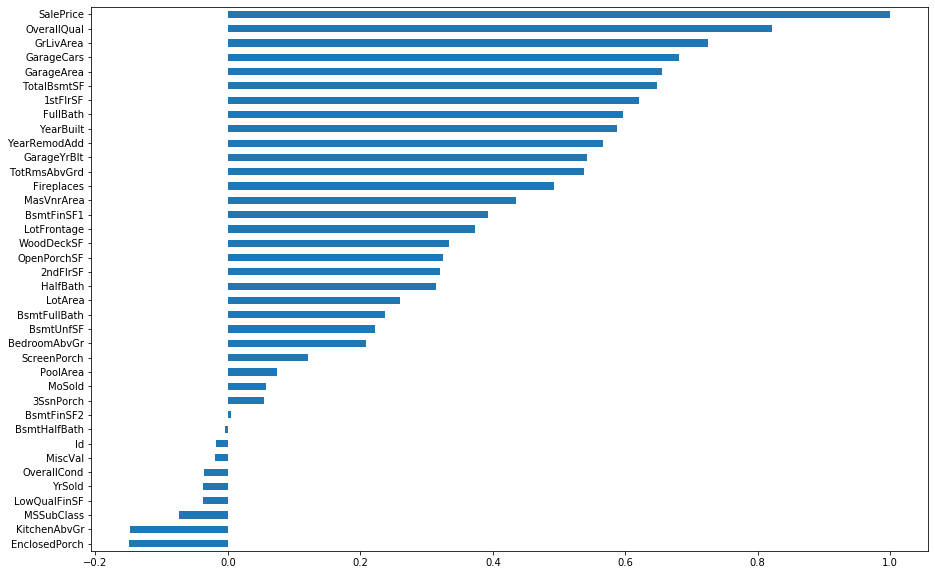

In [152]:

plt.subplots(figsize =(15, 10))
corr.plot(kind='barh');


There are  23 skewed numerical features to Box-Cox transform
(2917, 167)


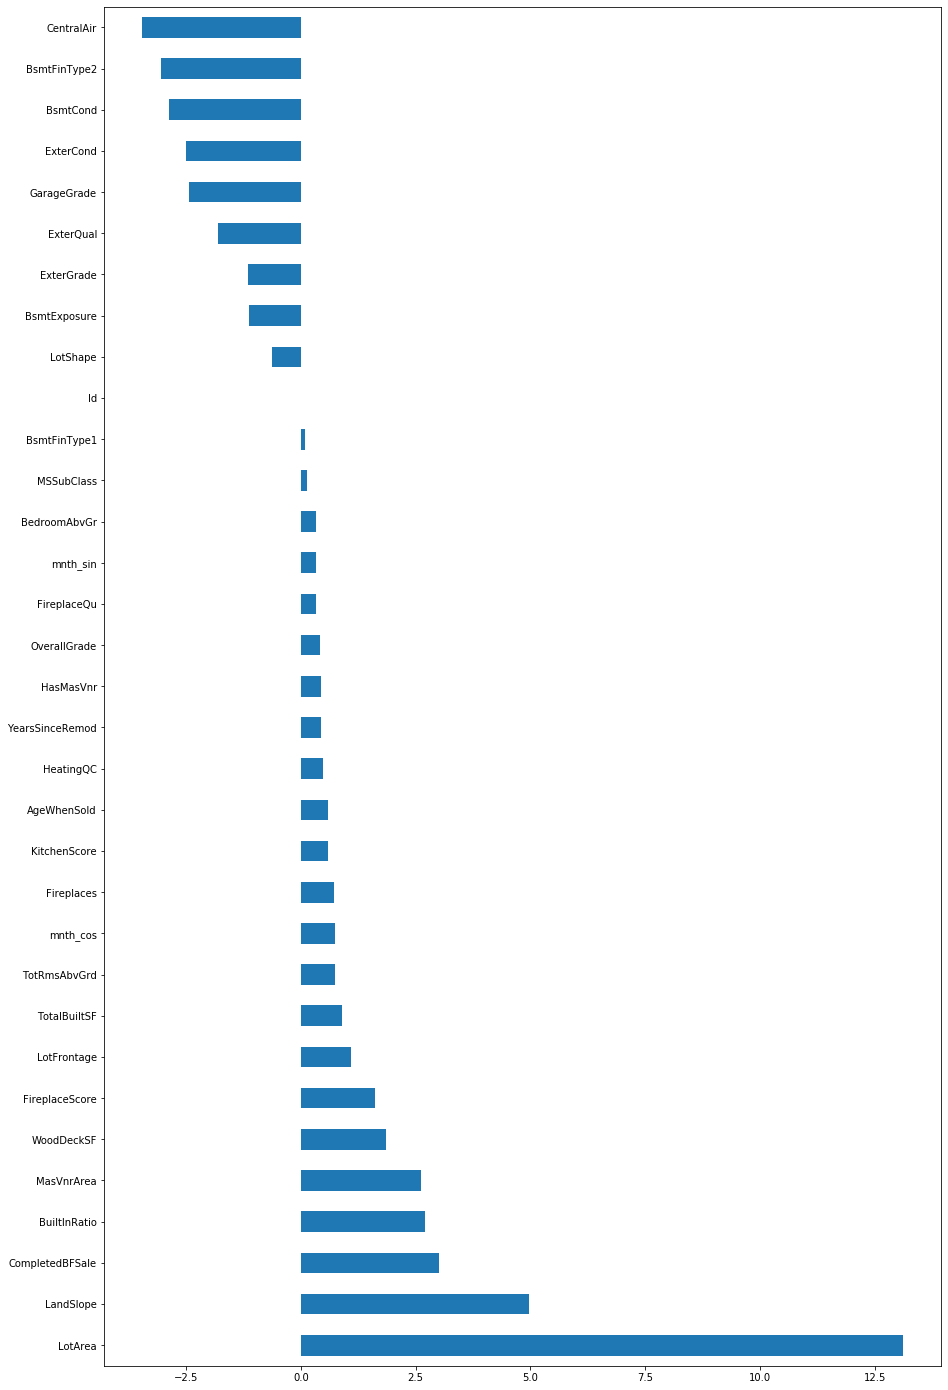

In [153]:

from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
numeric_feats = final_data.dtypes[final_data.dtypes != "object"].index

# Check how skewed they are
skewed_feats = final_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

plt.subplots(figsize =(15, 25))
skewed_feats.plot(kind='barh');


# In[423]:



skewness = skewed_feats[abs(skewed_feats) > 0.5]
print("There are ", skewness.shape[0],  "skewed numerical features to Box-Cox transform")

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    final_data[feat] = boxcox1p(final_data[feat], lam)
    
final_data = pd.get_dummies(final_data)
print(final_data.shape)


In [154]:


final_data = final_data.fillna(final_data.mean())

In [155]:
train = final_data[:ntrain]
test = final_data[ntrain:]

print(train.shape)
print(test.shape)


(1458, 167)
(1459, 167)


In [156]:

y_train

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [157]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from lightgbm import LGBMRegressor


In [158]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [159]:

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [168]:
score = rmsle_cv(model_lgb)


In [169]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [170]:

score = rmsle_cv(lasso)

In [171]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print("\nGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GBoost score: 0.1259 (0.0069)



In [172]:

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


# In[442]:


score = rmsle_cv(ENet)

In [173]:

from sklearn.svm import SVR
svr = make_pipeline(RobustScaler(), SVR(C=20, epsilon=0.008, gamma=0.0003, ))


# In[451]:


score = rmsle_cv(svr)

In [174]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

score = rmsle_cv(lm)

In [176]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

regressor = LinearRegression()  
regressor.fit(train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
coeff_df = pd.DataFrame(regressor.coef_, final_data.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
BedroomAbvGr,-0.002246
BsmtCond,0.019898
BsmtExposure,-0.018991
BsmtFinType1,-0.013326
BsmtFinType2,0.004311
...,...
SaleType_ConLI,-0.044169
SaleType_ConLw,-0.052312
SaleType_New,0.025552
SaleType_Oth,0.084077
